In [24]:
import os
import sys
import pandas as pd
import numpy as np
import pickle
import json

import matplotlib.pyplot as plt

### SWAT

In [4]:
def normalize2(a, min_a = None, max_a = None):
	if min_a is None: min_a, max_a = min(a), max(a)
	return (a - min_a) / (max_a - min_a), min_a, max_a

In [11]:
dataset_folder = 'data/SWaT'
file = os.path.join(dataset_folder, 'series.json')
df = pd.read_json(file, lines=True)

In [12]:
df.shape

(12087, 9)

In [25]:
df.head()

,ts,val,sco,pred,pmin,pmax,noti,pminModel,pmaxModel
0,1492984935,335.18332,NaN,NaN,NaN,NaN,False,NaN,NaN
1,1492985235,333.00000,NaN,NaN,NaN,NaN,False,NaN,NaN
2,1492985535,336.37332,NaN,NaN,NaN,NaN,False,NaN,NaN
3,1492985835,334.22000,NaN,NaN,NaN,NaN,False,NaN,NaN
4,1492986135,340.63000,NaN,NaN,NaN,NaN,False,NaN,NaN


In [44]:
df.describe()

,ts,val,sco,pred,pmin,pmax,pminModel,pmaxModel
count,1.208700e+04,12087.000000,3584.000000,3589.000000,3589.000000,3589.000000,50.000000,50.000000
mean,1.494719e+09,398.840426,0.512503,383.496565,336.578074,454.600433,327.764029,406.333687
std,9.155846e+06,50.727660,0.066676,29.034093,31.484735,39.582080,28.333379,27.368438
min,4.947993e+08,0.000000,0.343746,333.870000,253.573750,368.633330,287.947900,372.833340
25%,1.493895e+09,370.458335,0.472655,354.003400,309.560760,423.766660,309.955855,389.399995
50%,1.494801e+09,395.936680,0.492129,389.436300,341.616670,455.906920,314.296800,394.633340
75%,1.495708e+09,417.546665,0.518633,407.564760,361.268830,481.602840,342.615140,423.524995
max,1.496614e+09,701.823300,0.783072,444.469120,403.058070,551.891500,392.625980,480.552670


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12087 entries, 0 to 12086
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ts         12087 non-null  int64  
 1   val        12087 non-null  float64
 2   sco        3584 non-null   float64
 3   pred       3589 non-null   float64
 4   pmin       3589 non-null   float64
 5   pmax       3589 non-null   float64
 6   noti       12087 non-null  bool   
 7   pminModel  50 non-null     float64
 8   pmaxModel  50 non-null     float64
dtypes: bool(1), float64(7), int64(1)
memory usage: 767.4 KB


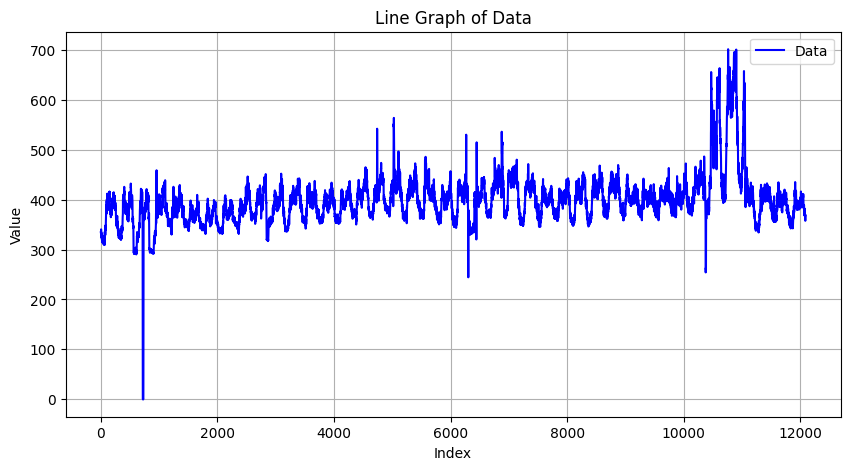

In [27]:
data_flat = df['val'].values.flatten()

# Create a line graph
plt.figure(figsize=(10, 5))
plt.plot(data_flat, label='Data', color='b')
plt.title('Line Graph of Data')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [20]:
dataset_folder = 'data/SWaT'
file = os.path.join(dataset_folder, 'series.json')
df_train = pd.read_json(file, lines=True)[['val']][3000:6000]
df_test  = pd.read_json(file, lines=True)[['val']][7000:12000]
train, min_a, max_a = normalize2(df_train.values)
test, _, _ = normalize2(df_test.values, min_a, max_a)
labels = pd.read_json(file, lines=True)[['noti']][7000:12000] + 0

In [21]:
train

array([[0.26887195],
       [0.27300339],
       [0.27166029],
       ...,
       [0.45564302],
       [0.53167111],
       [0.48660607]])

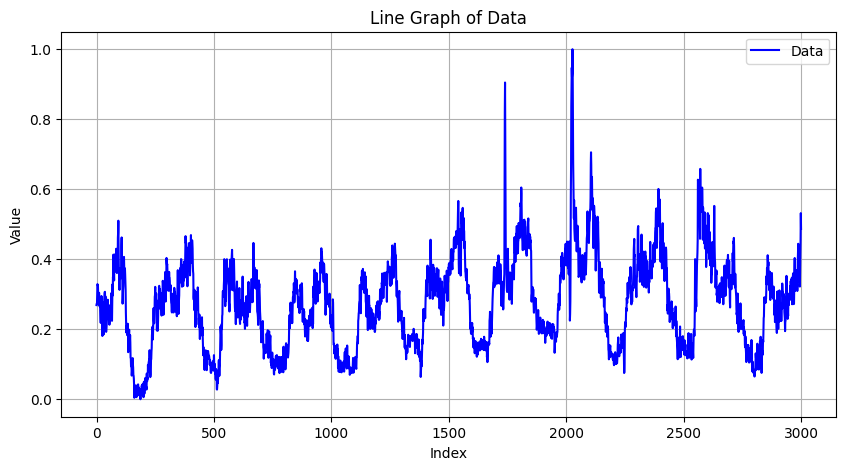

In [30]:
data_flat_train = train.flatten()

# Create a line graph
plt.figure(figsize=(10, 5))
plt.plot(data_flat_train, label='Data', color='b')
plt.title('Line Graph of Data')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [22]:
test

array([[0.4703873 ],
       [0.46535088],
       [0.47853321],
       ...,
       [0.2516314 ],
       [0.26688663],
       [0.30332406]])

In [23]:
labels

,noti
7000,0
7001,0
7002,0
7003,0
7004,0
...,...
11995,0
11996,0
11997,0
11998,0


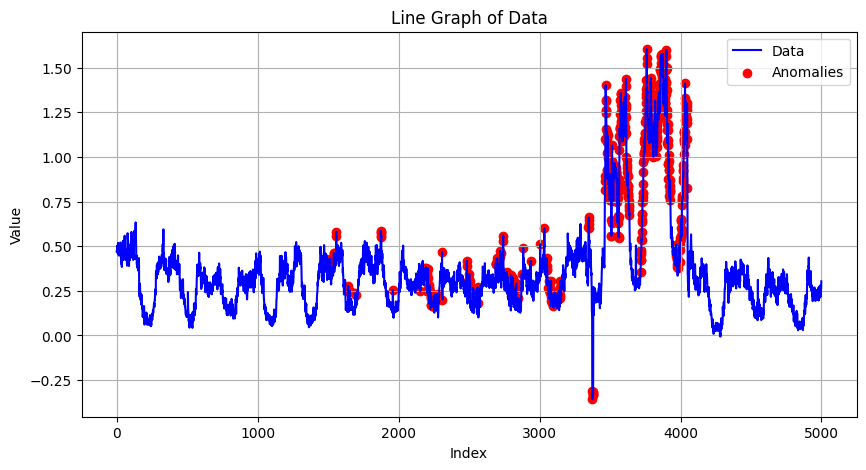

In [43]:
data_flat_test = test.flatten()
labels_data_flat = labels.values.flatten()

# Create a line graph
plt.figure(figsize=(10, 5))
plt.plot(data_flat_test, label='Data', color='b')

anomaly_indices = np.where(labels_data_flat == 1)[0]
plt.scatter(anomaly_indices, data_flat_test[anomaly_indices], color='r', label='Anomalies')

plt.title('Line Graph of Data')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

### MSL (C-1)

In [48]:
def normalize3(a, min_a = None, max_a = None):
	if min_a is None: min_a, max_a = np.min(a, axis = 0), np.max(a, axis = 0)
	return (a - min_a) / (max_a - min_a + 0.0001), min_a, max_a

In [49]:
dataset_folder = 'data/SMAP_MSL'
file = os.path.join(dataset_folder, 'labeled_anomalies.csv')
values = pd.read_csv(file)

In [50]:
values.head()

,chan_id,spacecraft,anomaly_sequences,class,num_values
0,P-1,SMAP,"[[2149, 2349], [4536, 4844], [3539, 3779]]","[contextual, contextual, contextual]",8505
1,S-1,SMAP,"[[5300, 5747]]",[point],7331
2,E-1,SMAP,"[[5000, 5030], [5610, 6086]]","[contextual, contextual]",8516
3,E-2,SMAP,"[[5598, 6995]]",[point],8532
4,E-3,SMAP,"[[5094, 8306]]",[point],8307


In [51]:
filenames = values['chan_id'].values.tolist()
filenames

['P-1',
 'S-1',
 'E-1',
 'E-2',
 'E-3',
 'E-4',
 'E-5',
 'E-6',
 'E-7',
 'E-8',
 'E-9',
 'E-10',
 'E-11',
 'E-12',
 'E-13',
 'A-1',
 'D-1',
 'P-2',
 'P-3',
 'D-2',
 'D-3',
 'D-4',
 'A-2',
 'A-3',
 'A-4',
 'G-1',
 'G-2',
 'D-5',
 'D-6',
 'D-7',
 'F-1',
 'P-4',
 'G-3',
 'T-1',
 'T-2',
 'D-8',
 'D-9',
 'F-2',
 'G-4',
 'T-3',
 'D-11',
 'D-12',
 'B-1',
 'G-6',
 'G-7',
 'P-7',
 'R-1',
 'A-5',
 'A-6',
 'A-7',
 'D-13',
 'P-2',
 'A-8',
 'A-9',
 'F-3',
 'M-6',
 'M-1',
 'M-2',
 'S-2',
 'P-10',
 'T-4',
 'T-5',
 'F-7',
 'M-3',
 'M-4',
 'M-5',
 'P-15',
 'C-1',
 'C-2',
 'T-12',
 'T-13',
 'F-4',
 'F-5',
 'D-14',
 'T-9',
 'P-14',
 'T-8',
 'P-11',
 'D-15',
 'D-16',
 'M-7',
 'F-8']

In [56]:
train = np.load(f'{dataset_folder}/train/C-1.npy')
train.shape

(2158, 55)

In [58]:
train, min_a, max_a = normalize3(train)

In [71]:
train

array([[0.98531355, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.98531355, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.98531355, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00537355, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00732757, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00732757, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [54]:
test = np.load(f'{dataset_folder}/test/C-1.npy')
test, _, _ = normalize3(test, min_a, max_a)

In [59]:
test.shape

(2264, 55)

In [72]:
test

array([[0.01660915, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01807467, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02002868, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.02491373, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02882176, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02979877, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [62]:
labels = np.zeros(test.shape)
indices = values[values['chan_id'] == 'C-1']['anomaly_sequences'].values[0]
indices

'[[550, 750], [2100, 2210]]'

In [63]:
indices = indices.replace(']', '').replace('[', '').split(', ')
indices

['550', '750', '2100', '2210']

In [64]:
indices = [int(i) for i in indices]
indices

[550, 750, 2100, 2210]

In [69]:
for i in range(0, len(indices), 2):
    labels[indices[i]:indices[i+1], :] = 1

In [70]:
labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

So, anomaly is given to all dimensions in this dataset.